<a href="https://colab.research.google.com/github/ShaliniR8/Tensorflow-and-keras/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**EXAMPLE- LINEAR KERNEL**

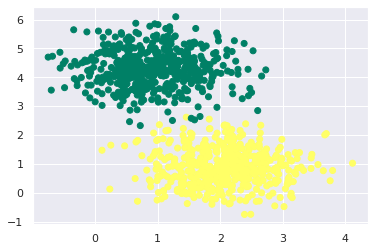

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=1000, centers=2, cluster_std=0.65, random_state=0)
plt.scatter(X[:,0],X[:,1], cmap='summer', c=y)


In [0]:
from sklearn.svm import SVC

indices_train= np.random.choice(range(len(X)), 800)
indices_test= [i for i in range(len(X)) if i not in list(indices_train)]

clf = SVC( kernel = 'linear', C=1E10)
model_linear= clf.fit(X[indices_train],y[indices_train])



In [9]:
from sklearn.metrics import mean_squared_error
preds = clf.predict( X[indices_test] )
rmse= np.sqrt( mean_squared_error(preds, y[indices_test]) )
print(rmse*100, "%")


4.714045207910317 %


**EXAMPLE- RBF KERNEL**

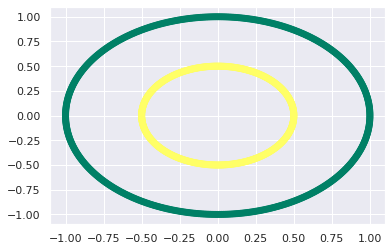

In [10]:
from sklearn.datasets.samples_generator import make_circles

X,y = make_circles(n_samples=1000, factor=0.5)
plt.scatter( X[:,0], X[:,1], cmap= 'summer', c=y)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y , test_size=0.20)
clf = SVC( kernel='rbf')
model_round= clf.fit( X_train, y_train)

In [12]:
preds = clf.predict( X_test )
rmse= np.sqrt( mean_squared_error(preds, y_test) )
print(rmse*100, "%")

0.0 %


In [0]:
from sklearn.datasets import fetch_olivetti_faces
faces= fetch_olivetti_faces(shuffle=True)

(400, 4096)
(400,)
(400, 64, 64)


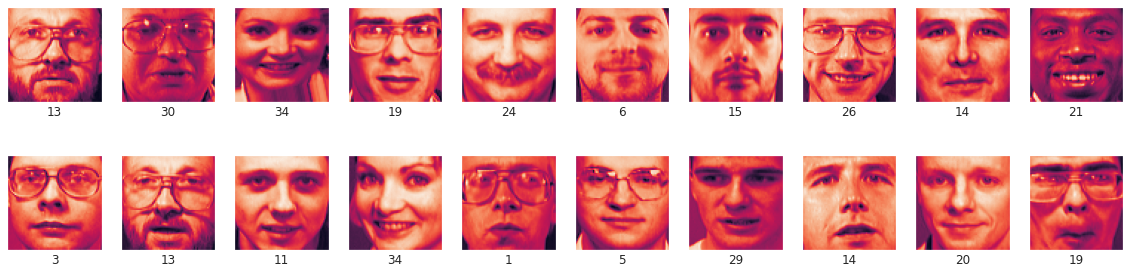

In [15]:
print(faces['data'].shape)
print(faces['target'].shape)
print(faces['images'].shape)

plt.figure(figsize=(20,5))
for i in range(20):
  plt.subplot(2,10, (1+i))
  plt.imshow(faces['images'][i]/255)
  plt.xlabel(faces['target'][i])
  plt.xticks([])
  plt.yticks([])

plt.show()

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA( n_components=150, whiten= True, random_state= 0)
clf = SVC( kernel = 'rbf')
model = make_pipeline(pca,clf)

In [0]:
X_train, X_test, y_train, y_test = train_test_split( faces['data'], faces['target'], train_size=0.80 , random_state= 42)

In [18]:
from sklearn.model_selection import GridSearchCV

grid_params= {
    'svc__C':[1,5, 10, 15],
    'svc__gamma':[0.0001,0.0005,0.001]
}

grid = GridSearchCV(model , grid_params )
grid.fit(X_train, y_train,)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [20]:
from sklearn.metrics import classification_report
model = grid.best_estimator_
preds = model.predict( X_test )

print(classification_report( y_test, preds))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         3
           2       1.00      0.25      0.40         4
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         1
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         5
          20       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
